# Exercice 11

In [13]:
# Home-made DFT
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt


def DFT(x):
    N = len(x)
    n = np.arange(N)
    if N % 2 == 0:
        k = np.arange(-N/2, N/2).reshape((N, 1))
    else:
        k = np.arange(-(N-1)/2, (N-1)/2 + 1).reshape((N, 1))
        
    # Equivalent à k = fftshift(fftfreq(N, 1/N))
    M = np.exp(-2j * np.pi * k * n / N)

    return M @ x / N # 1/N = dx/L

# Ou en utilisant des boucles (beaucoup plus lent !)


def DFT2(x):
    N = len(x)

    X = np.zeros(N, dtype=complex)
    if N % 2 == 0:
        k = np.arange(-N/2, N/2).reshape((N, 1))
    else:
        k = np.arange(-(N-1)/2, (N-1)/2 + 1).reshape((N, 1))
    for (i, k_) in enumerate(k):
        for n in range(N):
            X[i] += x[n] * np.exp(-2j * np.pi * k_ * n / N)

    return X / N

# Inverse DFT


def IDFT(X):

    N = len(X)
    n = np.arange(N)
    if N % 2 == 0:
        k = np.arange(-N/2, N/2).reshape((N, 1))
    else:
        k = np.arange(-(N-1)/2, (N-1)/2 + 1).reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)

    return X @ M

In [14]:
def plot_DFT(k, x, u_k, u_rec, u_k_np, u_rec_np, x_all, u_all, bounds=(-10, 10)):
    fig, ax = plt.subplots(3, figsize=(15, 15))

    ax[0].plot(x_all, u_all, label="u(x)", c='C0')
    ax[0].plot(x, np.real(u_rec), label="u_rec", c='C1')
    ax[0].plot(x, np.real(u_rec_np), label="u_rec_np", c='C2')
    ax[0].set_title("Time domain")
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("u")
    ax[0].legend()

    ax[1].plot(k, np.real(u_k), 'o-', label="$\Re(u_k)$ : DFT", c='C0')
    ax[1].plot(k, np.real(u_k_np), label="$\Re(u_k)$ : numpy",
               c='C0', linestyle='--')
    ax[1].plot(k, np.imag(u_k), 'o-', label="$\Im(u_k)$ : DFT", c='C1')
    ax[1].plot(k, np.imag(u_k_np), label="$\Im(u_k)$ : numpy",
               c='C1', linestyle='--')
    ax[1].set_xbound(bounds[0], bounds[1])
    ax[1].set_title("Frequency domain")
    ax[1].set_xlabel("k")
    ax[1].set_ylabel("u_k")
    ax[1].legend()

    ax[2].stem(k, np.abs(u_k), \
         markerfmt=" ", basefmt="C0", label="$|u_k|$ : DFT")
    ax[2].stem(k, np.abs(u_k_np), \
           markerfmt=" ", basefmt="C0--", label="$|u_k|$ : numpy")
    ax[2].set_xbound(bounds[0], bounds[1])
    ax[2].set_title("Amplitude spectrum")
    ax[2].set_xlabel("k")
    ax[2].set_ylabel("|u_k|")
    ax[2].legend()

    plt.show()

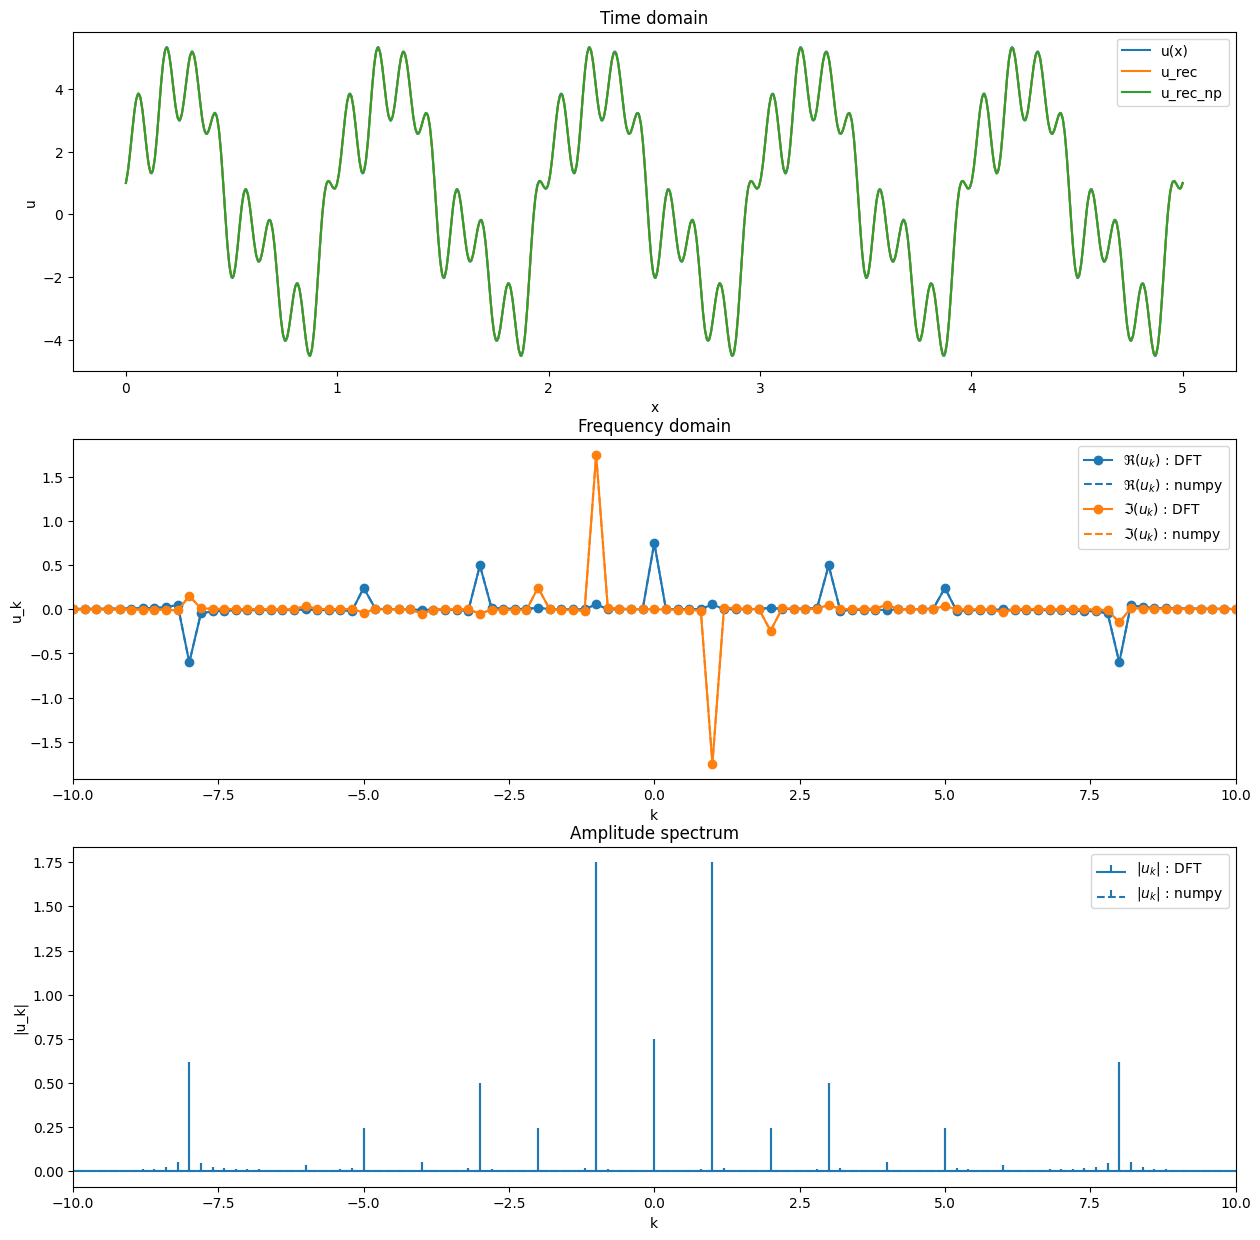

In [15]:
# Test 1: spectre discret
freqs_sin = [1.0, 2.0, 4.0, 6.0]
amplis_sin = [3.5, 0.5, -0.1, 0.075]
freqs_cos = [0.0, 3.0, 5.0, 8.0]
amplis_cos = [0.75, 1.0, 0.5, -1.25]
# -> definit un spectre discret

f = lambda x: sum([a * np.sin(2 * np.pi * f * x) for a, f in zip(amplis_sin, freqs_sin)]) + sum([a * np.cos(2 * np.pi * f * x) for a, f in zip(amplis_cos, freqs_cos)])

L = 5.0 # PS: physical wavenumber is k/L -> plus le domaine et N sont grands, plus on verra les delta de Dirac
x_all = np.linspace(0, L, 5000)
u_all = f(x_all)

N = 2**9
x = np.linspace(0, L, N)
u = f(x)
if N % 2 == 0:
    k = np.arange(-N/2, N/2).reshape((N, 1))
else:
    k = np.arange(-(N-1)/2, (N-1)/2 + 1).reshape((N, 1))

# print(f"Temps de calcul pour N = {N} avec DFT :")
# %timeit DFT(u)

u_k = DFT(u)
u_rec = IDFT(u_k)

# Via numpy
# print(f"Temps de calcul pour N = {N} avec numpy :")
# %timeit fftshift(fft(u)) / N

u_k_np = fftshift(fft(u)) / N
u_rec_np = ifft(ifftshift(u_k_np)) * N

plot_DFT(k/L, x, u_k, u_rec, u_k_np, u_rec_np, x_all, u_all, bounds=(-max(freqs_sin + freqs_cos) - 2, max(freqs_sin + freqs_cos) + 2))


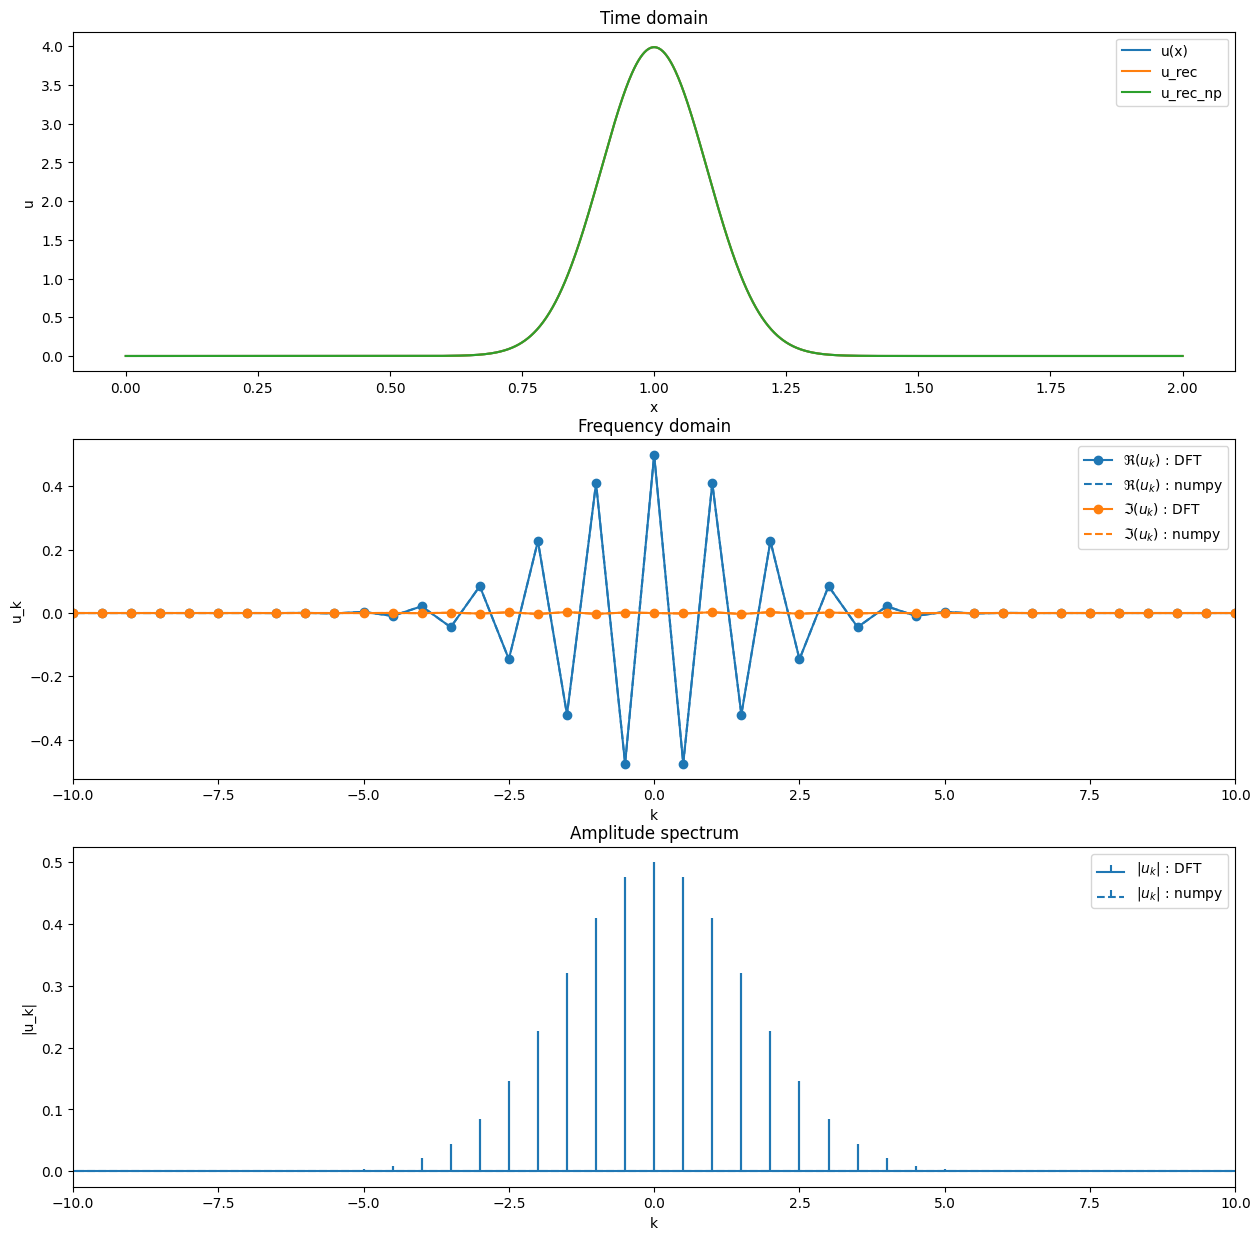

In [16]:
# Test 2: spectre continu
mu, sigma = 1.0, 0.1
L = 2.0
f = lambda x: np.exp(- (x - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

x_all = np.linspace(0, L, 5000)
u_all = f(x_all)
u_analytic = lambda k: np.exp(1j * k * mu - (sigma*k)**2 / 2) / np.sqrt(2 * np.pi) # unused

N = 2**10
x = np.linspace(0, L, N)
u = f(x)
if N % 2 == 0:
    k = np.arange(-N/2, N/2).reshape((N, 1))
else:
    k = np.arange(-(N-1)/2, (N-1)/2 + 1).reshape((N, 1))

u_k = DFT(u)
u_rec = IDFT(u_k)

# Via numpy
u_k_np = fftshift(fft(u)) / N
u_rec_np = ifft(ifftshift(u_k_np)) * N

plot_DFT(k/L, x, u_k, u_rec, u_k_np, u_rec_np, x_all, u_all)

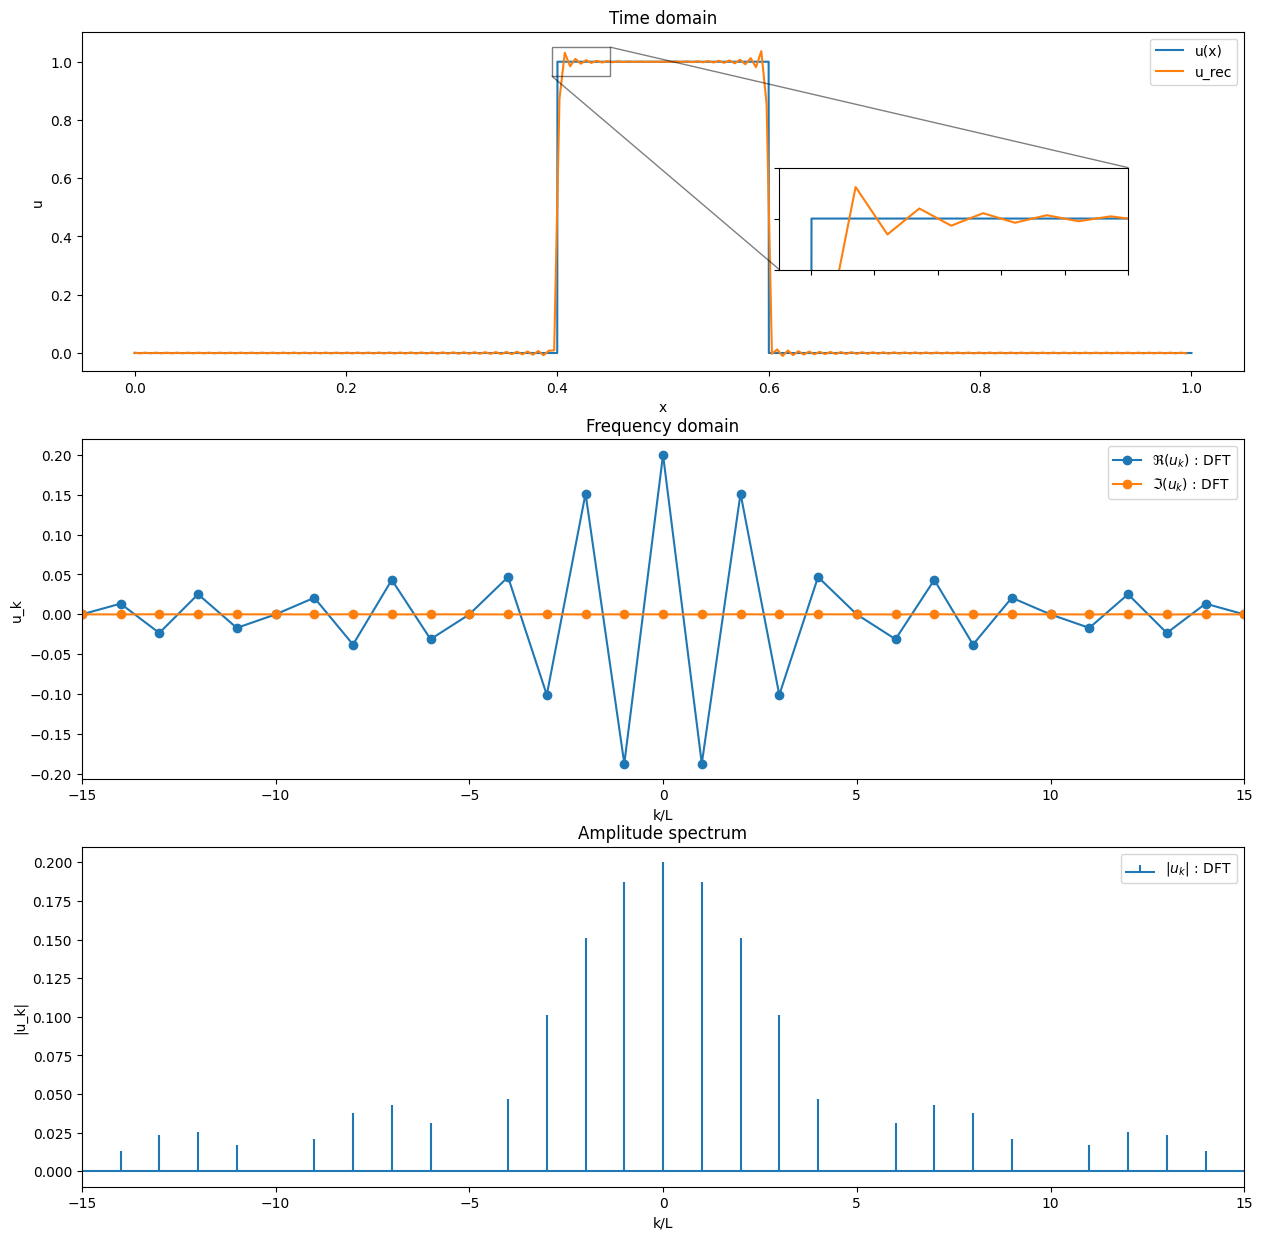

In [17]:
# Test 3 : phénomène de Gibbs
def f(x): return np.where((x >= 0.4) & (x <= 0.6), 1.0, 0.0)


L = 1.0

x_all = np.linspace(0, L, 5000)
u_all = f(x_all)
# u_analytic ~ sin(k)/k

N = 2**13  # -> compute high res DFT
x = np.linspace(0, L, N)
u = f(x)
if N % 2 == 0:
    k = np.arange(-N/2, N/2).reshape((N, 1))
else:
    k = np.arange(-(N-1)/2, (N-1)/2 + 1).reshape((N, 1))

# Le phenomène de Gibbs aparait si on tronque une DFT exacte, pas si on la calcule directement avec moins de points !
mask = np.abs(k.flatten()) < 100
u_k = DFT(u)[mask]

u_rec = IDFT(u_k)
x_trunc = np.linspace(0, L, len(u_rec), endpoint=False)

fig, ax = plt.subplots(3, figsize=(15, 15))

ax[0].plot(x_all, u_all, label="u(x)", c='C0')
ax[0].plot(x_trunc, np.real(u_rec), label="u_rec", c='C1')
axin = ax[0].inset_axes(
    [0.6, 0.3, 0.3, 0.3],
    xlim=(0.395, 0.45), ylim=(0.95, 1.05), xticklabels=[], yticklabels=[]
)
axin.plot(x_all, u_all, c='C0')
axin.plot(x_trunc, np.real(u_rec), c='C1')

ax[0].indicate_inset_zoom(axin, edgecolor="black")
ax[0].set_title("Time domain")
ax[0].set_xlabel("x")
ax[0].set_ylabel("u")
ax[0].legend()

ax[1].plot(k[mask]/L, np.real(u_k), 'o-', label="$\Re(u_k)$ : DFT", c='C0')
ax[1].plot(k[mask]/L, np.imag(u_k), 'o-', label="$\Im(u_k)$ : DFT", c='C1')
ax[1].set_xbound(-15, 15)
ax[1].set_title("Frequency domain")
ax[1].set_xlabel("k/L")
ax[1].set_ylabel("u_k")
ax[1].legend()

ax[2].stem(k[mask]/L, np.abs(u_k),
           markerfmt=" ", basefmt="C0", label="$|u_k|$ : DFT")
ax[2].set_xbound(-15, 15)
ax[2].set_title("Amplitude spectrum")
ax[2].set_xlabel("k/L")
ax[2].set_ylabel("|u_k|")
ax[2].legend()

plt.show()

In [18]:
%reset -f

# Exercice 12

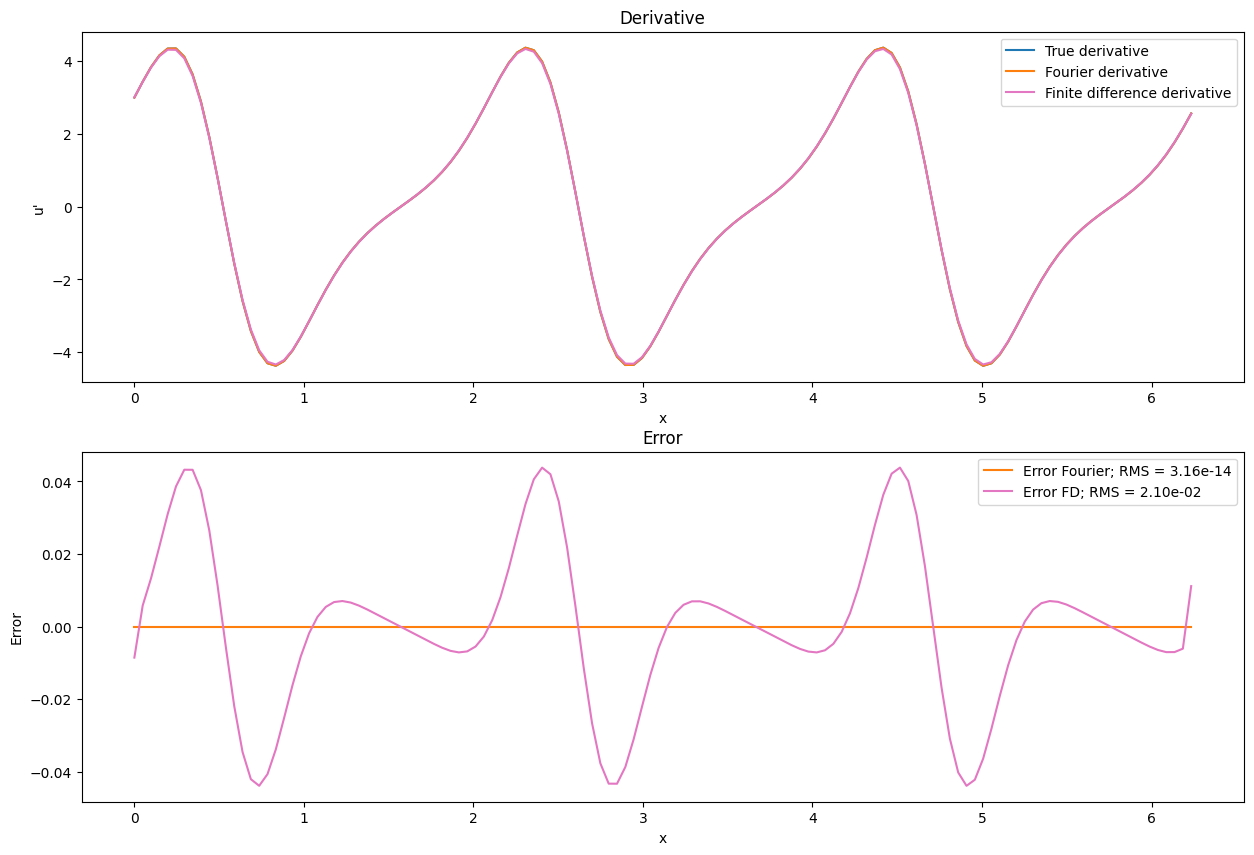

In [19]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

def fourier_deriv(u, L):
    N = len(u)

    k = fftfreq(N, L/N)
    
    u_k = fft(u)
    u_k_prime = (1j * 2*np.pi * k) * u_k
    
    # On ne divise pas par L car les k issus de fftfreq sont déjà divisés par L !

    return np.real(ifft(u_k_prime))

f = lambda x: np.exp(np.sin(3.0*x))
df = lambda x: 3.0 * np.cos(3.0*x) * np.exp(np.sin(3.0*x)) # True derivative
# f = lambda x: np.exp(-(x - 3.0)**2 / 0.5) * x * (x**2 - 3.0)
# df = lambda x: np.exp(-(x - 3.0)**2 / 0.5) * (-2*(x - 3.0) / 0.5) * x * (x**2 - 3.0) \
#                + np.exp(-(x - 3.0)**2 / 0.5) * (3*x**2 - 3.0)

L = 2*np.pi
N = 128

x = np.arange(0, L, L/N)

u = f(x)
du_true = df(x)
du_fourier = fourier_deriv(u, L)

# Finite difference
D = np.zeros((len(x), len(x)))
for i in range(1,len(x)-1):
    D[i, i+1] = 1.0
    D[i, i-1] = -1.0
# Boundary conditions
D[0, 0] = -3.0
D[-1, -1] = 3.0
D[0, 1] = 4.0
D[-1, -2] = -4.0
D[0, 2] = -1.0
D[-1, -3] = 1.0
D = D / (2*(x[1] - x[0]))

df_fd = D @ u

fig, ax = plt.subplots(2, figsize=(15, 10))

ax[0].plot(x, du_true, label="True derivative", c='C0')
ax[0].plot(x, du_fourier, label="Fourier derivative", c='C1')
ax[0].plot(x, df_fd, label="Finite difference derivative", c='C6')
ax[0].set_title("Derivative")
ax[0].set_xlabel("x")
ax[0].set_ylabel("u'")
ax[0].legend()

error_fourier = du_true - du_fourier
error_fd = du_true - df_fd

ax[1].plot(x, error_fourier, label=f"Error Fourier; RMS = {np.sqrt(np.nanmean(error_fourier**2)):.2e}", c='C1')
ax[1].plot(x, error_fd, label=f"Error FD; RMS = {np.sqrt(np.nanmean(error_fd**2)):.2e}", c='C6')
ax[1].set_title("Error")
ax[1].set_xlabel("x")
ax[1].set_ylabel("Error")
ax[1].legend()

plt.show()

# As wee see, the Fourier derivative is very accurate... inside the domain of the function and if it is periodic.


In [20]:
%reset -f

# Exercice 13

In [21]:
# TODO : filtering

# Exercice 14

In [22]:
# TODO : advection lineaire avec vitesse variable

# Exercice 15

In [23]:
# TODO